## Explore Support Vector Machines

A SVM is a linear binary classification model used to represent a hypothesis, $h(\mathbf{x})$, that predicts the class, $\hat{y} \in \{-1, +1\}$, of sample $x$ is of the following form:

$$ h(\mathbf{x}) = \text{sign}(\mathbf{w} \cdot \mathbf{x} + b) $$

The distances from the optimal hyperplane to the support vectors is called the margin and is defined as:

$$\frac{1}{||\mathbf{w}||}$$

The optimal hyperplane has the maximum possible margin.

Hard Margin SVM:

$$ \text{min}_{\mathbf{w}, b} \frac{1}{2} \mathbf{w} \cdot \mathbf{w}$$

Subject to:

$$ y_k(\mathbf{w} \cdot \mathbf{x}_k + b) \geq 1$$ 
$$k \in [1,m]$$

Soft Margin SVM:

$$ \text{min}_{\mathbf{w}, b, \mathbf{\xi}} \frac{1}{2} \mathbf{w} \cdot \mathbf{w} + C\sum_{k=1}^{m}\xi_k$$

Subject to:

$$ y_k(\mathbf{w} \cdot \mathbf{x}_k + b) \geq 1 - \xi_k $$ 
$$ \xi_k \geq 0 $$
$$k \in [1,m]$$

In [1]:
# Imports and helper functions 
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 35,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    plt.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 25,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend(['label 1','label 0'])

def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,colors = 'k',linewidths = 3)
    plot_points(X, y)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    plt.show()

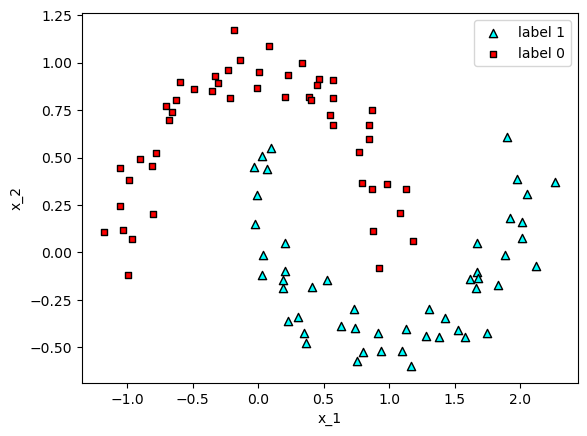

In [2]:
# Generate a dataset with 100 samples, noise level of 0.1, and a random state for reproducibility
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Plot the dataset
plot_points(X,y)

In [3]:
# Create arrays of possible hyperparameter values and print them
C_values = np.logspace(start = -3, stop = 3, base = 10, num = 7)
gamma_values = np.logspace(start = -3, stop = 3, base = 10, num = 7)

print(C_values)
print(gamma_values)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


C: 1.0 , Gamma: 0.001


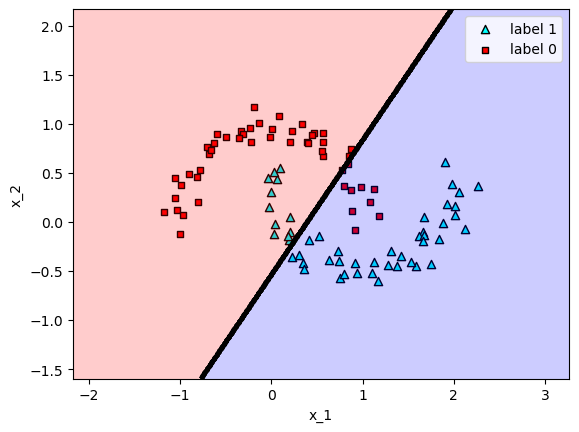

Accuracy: 0.79


In [4]:
# Create a SVM Classifier with arbitrary C and gamma
C_val_index = 3
gamma_val_index = 0

svm = SVC(C = C_values[C_val_index], gamma = gamma_values[gamma_val_index], kernel='rbf')

# Fit it to the data
svm.fit(X,y)

# Print C and Gamma Values and plot the resulting hyperplane
print(f'C: {C_values[C_val_index]} , Gamma: {gamma_values[gamma_val_index]}')
plot_model(X,y,svm)

# Print the accuracy
print(f'Accuracy: {svm.score(X,y)}')

C: 1.0 , Gamma: 1.0


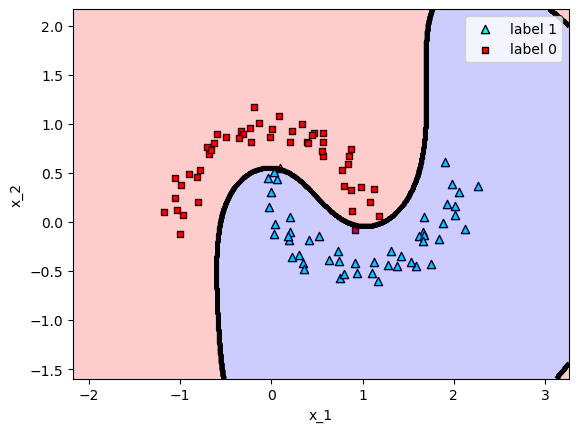

Accuracy: 0.98


In [5]:
# Create a SVM Classifier with arbitrary C and gamma
C_val_index = 3
gamma_val_index = 3

svm = SVC(C = C_values[C_val_index], gamma = gamma_values[gamma_val_index], kernel='rbf')

# Fit it to the data
svm.fit(X,y)

# Print C and Gamma Values and plot the resulting hyperplane
print(f'C: {C_values[C_val_index]} , Gamma: {gamma_values[gamma_val_index]}')
plot_model(X,y,svm)

# Print the accuracy
print(f'Accuracy: {svm.score(X,y)}')